In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [7.5,14]

In [13]:
# wczytaj dane i odrzuć wiersze, w których występuje NaN (nie ma shot_made_flag)
data=pd.read_csv("./all/data.csv")
print(data.shape)
data.dropna(inplace=True)
print(data.shape)
print(data.head())

(30697, 25)
(25697, 25)
         action_type combined_shot_type  game_event_id   game_id      lat  \
1          Jump Shot          Jump Shot             12  20000012  34.0443   
2          Jump Shot          Jump Shot             35  20000012  33.9093   
3          Jump Shot          Jump Shot             43  20000012  33.8693   
4  Driving Dunk Shot               Dunk            155  20000012  34.0443   
5          Jump Shot          Jump Shot            244  20000012  34.0553   

   loc_x  loc_y       lon  minutes_remaining  period   ...          shot_type  \
1   -157      0 -118.4268                 10       1   ...     2PT Field Goal   
2   -101    135 -118.3708                  7       1   ...     2PT Field Goal   
3    138    175 -118.1318                  6       1   ...     2PT Field Goal   
4      0      0 -118.2698                  6       2   ...     2PT Field Goal   
5   -145    -11 -118.4148                  9       3   ...     2PT Field Goal   

          shot_zone_area  

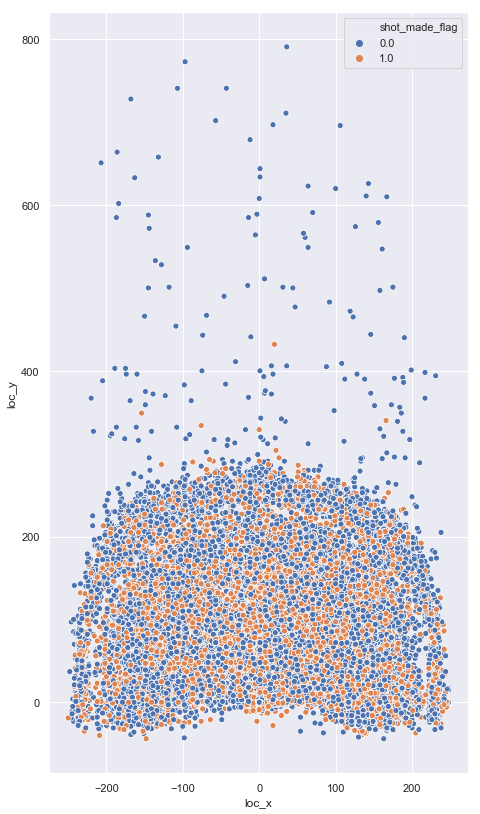

In [14]:
sns.scatterplot(x=data["loc_x"], y=data["loc_y"], hue=data["shot_made_flag"])
plt.show()

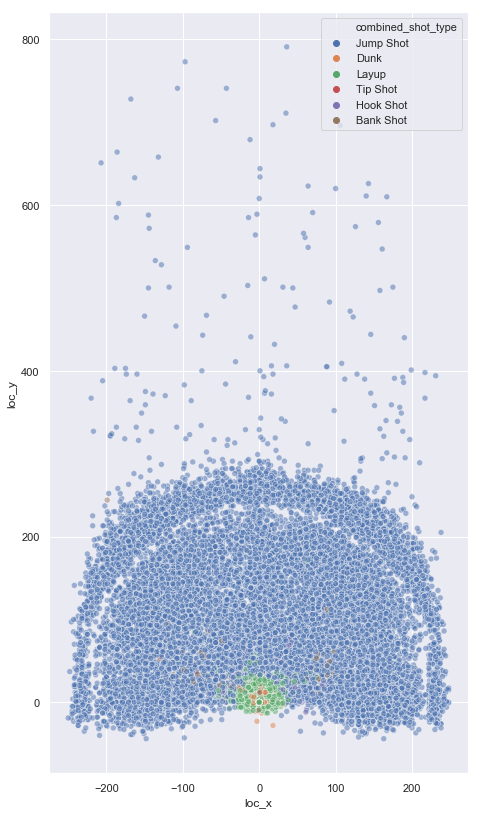

In [17]:
sns.scatterplot(x=data["loc_x"], y=data["loc_y"], hue=data["combined_shot_type"], alpha=0.5)
plt.show()

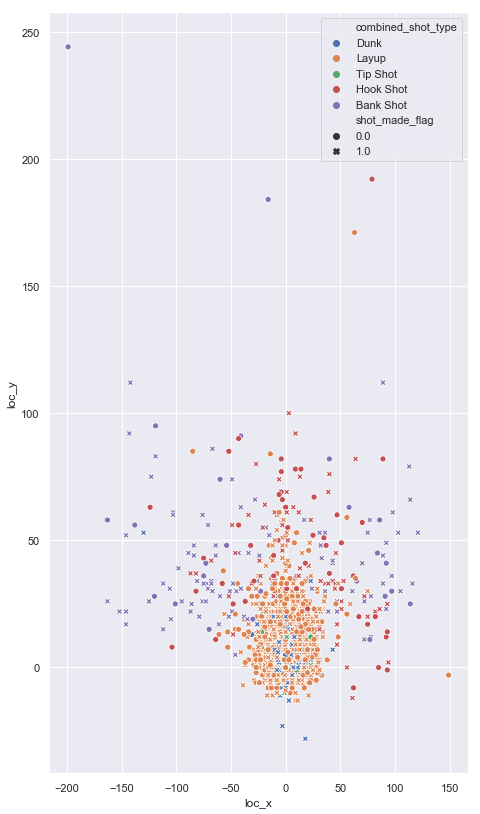

In [27]:
sns.scatterplot(x=data["loc_x"], y=data["loc_y"], hue=data.loc[data["combined_shot_type"]!="Jump Shot"]["combined_shot_type"], style=data["shot_made_flag"])
plt.show()

<Figure size 4.62546e+06x4.62546e+06 with 0 Axes>

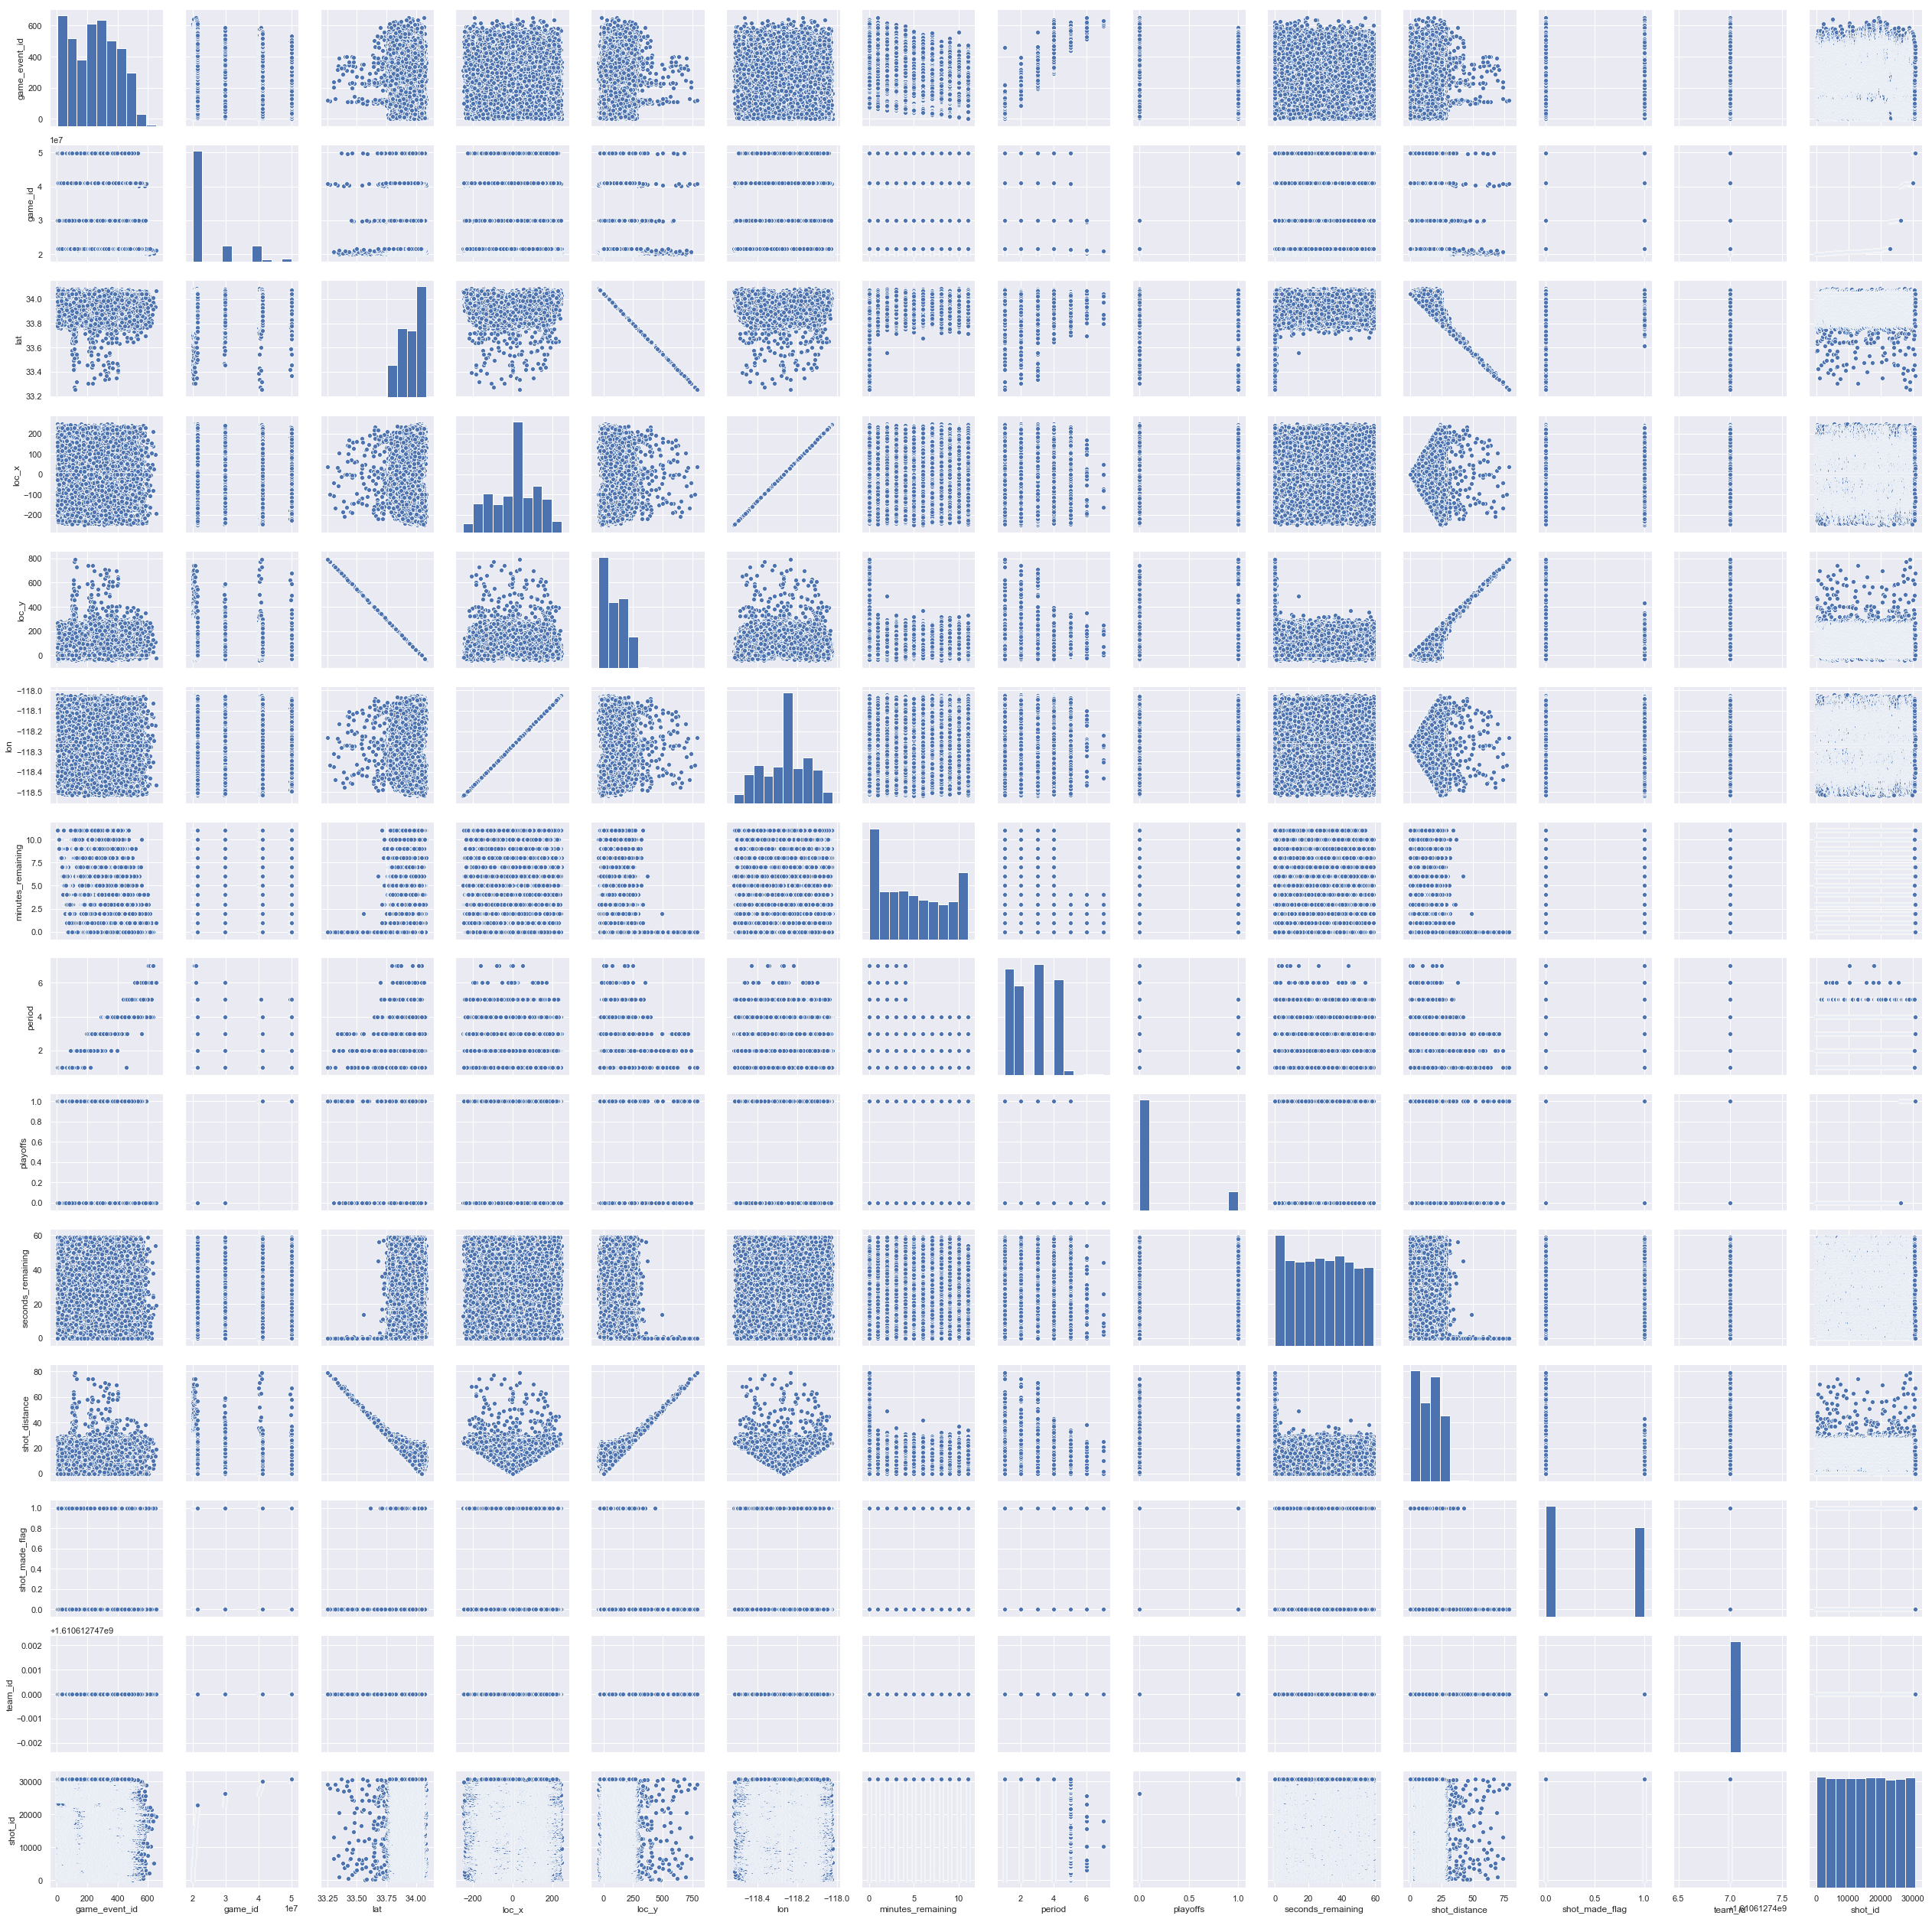

In [31]:
sns.pairplot(data)
plt.show()